In [2]:
import pandas as pd

In [100]:
import datetime

In [9]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [147]:
COVID = pd.read_excel('./코로나바이러스감염증-19_확진환자_발생현황_220501.xlsx', header=4)
COVID.drop(0,inplace=True)
COVID.head()

,일자,계(명),국내발생(명),해외유입(명),사망(명)
1,2020-01-20 00:00:00,1,-,1,-
2,2020-01-21 00:00:00,0,-,-,-
3,2020-01-22 00:00:00,0,-,-,-
4,2020-01-23 00:00:00,0,-,-,-
5,2020-01-24 00:00:00,1,-,1,-


In [148]:
COVID.replace({'국내발생(명)':'-'},{'국내발생(명)':'0'}, inplace=True)
COVID.replace({'해외유입(명)':'-'},{'해외유입(명)':'0'}, inplace=True)
COVID.replace({'사망(명)':'-'},{'사망(명)':'0'}, inplace=True)

In [149]:
COVID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 1 to 833
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   일자       833 non-null    object
 1   계(명)     833 non-null    int64 
 2   국내발생(명)  833 non-null    object
 3   해외유입(명)  833 non-null    object
 4   사망(명)    833 non-null    object
dtypes: int64(1), object(4)
memory usage: 32.7+ KB


In [150]:
COVID['일자'] = pd.to_datetime(COVID['일자'])
COVID

,일자,계(명),국내발생(명),해외유입(명),사망(명)
1,2020-01-20,1,0,1,0
2,2020-01-21,0,0,0,0
3,2020-01-22,0,0,0,0
4,2020-01-23,0,0,0,0
5,2020-01-24,1,0,1,0
...,...,...,...,...,...
829,2022-04-27,76775,76738,37,141
830,2022-04-28,57460,57439,21,122
831,2022-04-29,50568,50538,30,136
832,2022-04-30,43286,43274,12,70


In [151]:
COVID.head()

,일자,계(명),국내발생(명),해외유입(명),사망(명)
1,2020-01-20,1,0,1,0
2,2020-01-21,0,0,0,0
3,2020-01-22,0,0,0,0
4,2020-01-23,0,0,0,0
5,2020-01-24,1,0,1,0


In [152]:
COVID = COVID.astype({'국내발생(명)':'int'})
COVID = COVID.astype({'해외유입(명)':'int'})
COVID = COVID.astype({'사망(명)':'int'})

In [153]:
COVID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 1 to 833
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   일자       833 non-null    datetime64[ns]
 1   계(명)     833 non-null    int64         
 2   국내발생(명)  833 non-null    int32         
 3   해외유입(명)  833 non-null    int32         
 4   사망(명)    833 non-null    int32         
dtypes: datetime64[ns](1), int32(3), int64(1)
memory usage: 22.9 KB


In [154]:
COVID = COVID.drop(['일자'], axis=1)

In [155]:
from sklearn.model_selection import train_test_split

X = COVID.drop(['사망(명)'], axis=1)
y = COVID['사망(명)']

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=13)

In [158]:
lr = LogisticRegression(solver='liblinear', random_state=13)
lr.fit(X_train, y_train)

c:\Users\MINU\miniconda3\envs\ds_study\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(random_state=13, solver='liblinear')

In [160]:
import numpy as np

CO = np.array([26000,25500,500])
lr.predict(CO)

c:\Users\MINU\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[26000 25500   500].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [161]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [162]:
estimators = [
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(solver='liblinear', random_state=13))
]

pipe = Pipeline(estimators)

In [163]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(random_state=13, solver='liblinear'))])

In [164]:
import statsmodels.api as sm
lm = sm.OLS(y, X).fit()

In [165]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  사망(명)   R-squared (uncentered):                   0.819
Model:                            OLS   Adj. R-squared (uncentered):              0.818
Method:                 Least Squares   F-statistic:                              1876.
Date:                Fri, 06 May 2022   Prob (F-statistic):                   7.17e-309
Time:                        20:41:20   Log-Likelihood:                         -4049.7
No. Observations:                 833   AIC:                                      8103.
Df Residuals:                     831   BIC:                                      8113.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
계(명)           0.0342      0.006      6.082      0.000       0.023       0.045
국내발생(명)       -0.0333      0.006     -5.922      0.000      -0.044      -0.022
해외유입(명)        0.0675      0.011      6.002      0.000       0.045       0.090
==============================================================================
Omnibus:                      358.708   Durbin-Watson:                   0.617
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6882.727
Skew:                           1.464   Prob(JB):                         0.00
Kurtosis:                      16.774   Cond. No.                     9.79e+15
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 9.4e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [169]:
CO = np.array([92976,92957,19])
lm.predict(CO)[0]

83.24992579952256

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

In [138]:
import statsmodels.api as sm
X = COVID['계(명)']
y = COVID['사망(명)']
lm = sm.OLS(y, X).fit()

In [141]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  사망(명)   R-squared (uncentered):                   0.811
Model:                            OLS   Adj. R-squared (uncentered):              0.811
Method:                 Least Squares   F-statistic:                              3568.
Date:                Fri, 06 May 2022   Prob (F-statistic):                   3.73e-303
Time:                        20:33:08   Log-Likelihood:                         -4067.2
No. Observations:                 833   AIC:                                      8136.
Df Residuals:                     832   BIC:                                      8141.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
계(명)           0.0009   1.51e-05     59.735      0.000       0.001       0.001
==============================================================================
Omnibus:                      323.110   Durbin-Watson:                   0.603
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6594.896
Skew:                           1.242   Prob(JB):                         0.00
Kurtosis:                      16.559   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

c:\Users\MINU\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\MINU\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\MINU\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\MINU\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47581 (\N{HANGUL SYLLABLE MANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


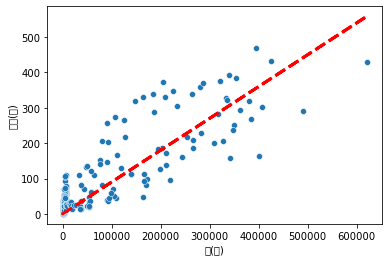

In [139]:
pred = lm.predict(X)
sns.scatterplot(x=X, y=y)
plt.plot(X, pred, 'r', ls='--', lw=3)
plt.show()

In [145]:
import numpy as np

CO = np.array([26000])
print(lm.predict(CO))

[23.38002998]
